In [1]:
import os
import tensorflow as tf

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = tf.keras.datasets.cifar10.load_data()

In [3]:
## data preprocessing
def preproc_x(x, flatten=True):
    x = 2 * ((x-x.min()) / (x.max()-x.min())) - 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tf.keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 512, 256, 256, 128, 128, 64, 64, 32, 32]):
    input_layer = tf.keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tf.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = tf.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = tf.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = tf.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               16512 

In [7]:
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 35us/sample - loss: 1.8218 - accuracy: 0.3435 - val_loss: 1.6478 - val_accuracy: 0.4144
Epoch 2/100
50000/50000 [==============================] - 1s 18us/sample - loss: 1.5575 - accuracy: 0.4465 - val_loss: 1.5198 - val_accuracy: 0.4660
Epoch 3/100
50000/50000 [==============================] - 1s 19us/sample - loss: 1.4231 - accuracy: 0.4979 - val_loss: 1.4431 - val_accuracy: 0.4910
Epoch 4/100
50000/50000 [==============================] - 1s 19us/sample - loss: 1.3214 - accuracy: 0.5342 - val_loss: 1.3787 - val_accuracy: 0.5167
Epoch 5/100
50000/50000 [==============================] - 1s 19us/sample - loss: 1.2343 - accuracy: 0.5668 - val_loss: 1.3768 - val_accuracy: 0.5251
Epoch 6/100
50000/50000 [==============================] - 1s 19us/sample - loss: 1.1528 - accuracy: 0.5952 - val_loss: 1.4096 - val_accuracy: 0.5169
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 1s 19us/sample - loss: 0.0940 - accuracy: 0.9695 - val_loss: 3.1151 - val_accuracy: 0.5362
Epoch 56/100
50000/50000 [==============================] - 1s 19us/sample - loss: 0.0853 - accuracy: 0.9727 - val_loss: 3.2228 - val_accuracy: 0.5423
Epoch 57/100
50000/50000 [==============================] - 1s 19us/sample - loss: 0.0902 - accuracy: 0.9710 - val_loss: 3.3524 - val_accuracy: 0.5447
Epoch 58/100
50000/50000 [==============================] - 1s 19us/sample - loss: 0.0774 - accuracy: 0.9746 - val_loss: 3.0972 - val_accuracy: 0.5297
Epoch 59/100
50000/50000 [==============================] - 1s 19us/sample - loss: 0.0826 - accuracy: 0.9743 - val_loss: 2.8986 - val_accuracy: 0.5314
Epoch 60/100
50000/50000 [==============================] - 1s 18us/sample - loss: 0.0850 - accuracy: 0.9729 - val_loss: 3.0070 - val_accuracy: 0.5343
Epoch 61/100
50000/50000 [==============================] - 1s 19us/sample - loss: 0.0767 - ac

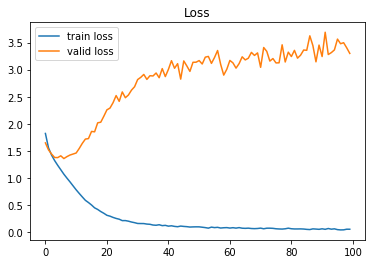

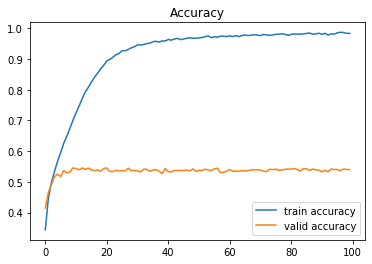

In [11]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()